In [5]:
import os, re 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
def get_results_dir(model_name, dataset_name, model_type, fault_type):
    d = {
        'vgg16': {
            'cifar10': {
                'full': {
                    'faults': './logs/vgg16/cifar10/faults',
                    'zero_bit_masking':  './logs/vgg16/cifar10/zero_bit_masking',
                },
                'prune': {
                    'faults': './logs/vgg16/cifar10/prune/scratchB/faults',
                    'zero_bit_masking': './logs/vgg16/cifar10/prune/scratchB/zero_bit_masking',
                }
            }
        }
        
    }
    return d[model_name][dataset_name][model_type][fault_type]



model_name = 'vgg16'
dataset_name = 'cifar10'

model_types = ['full', 'prune']
fault_types = ['faults', 'zero_bit_masking']
# fault_types = ['faults']


In [7]:
def parse_log(log_path):
    # result = {trial_id: [#flipped_bits, #changed_params, test_accuracy]}
    result = {}
    with open(log_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            line = line.strip()
            if line:
                flipped_bits, changed_params, test_accuracy = 0, 0, None 
                items = line.split(',')
                for item in items:
                    if 'flipped_bits' in item:
                        flipped_bits = int(item.split()[1])
                    if 'changed_params' in item:
                        changed_params = int(item.split()[1])
                    if 'test_accuracy' in item:
                        test_accuracy = float(item.split()[1])
                    if 'trial' in item:
                        trial = int(item.split()[1])
                if test_accuracy:
                    result[trial] = [flipped_bits, changed_params, test_accuracy]
    result = [result[trial_id] for trial_id in sorted(result.keys())]
    return result 

def load_results(model_type, fault_type):
    # results = {fault_rate: trial_id: [#flipped bits, # changed_params, test_accuracy]}
    results = {}
    results_dir = get_results_dir(model_name, dataset_name, model_type, fault_type)
    fault_rates_folders = os.listdir(results_dir)
    for folder in fault_rates_folders:
        # each folder has a log.txt file and a folder that contains the stats
        log_path = os.path.join(results_dir, folder, 'logs.txt')
        log_result = parse_log(log_path)
        fault_rate = float(folder)
        results[fault_rate] = log_result
#         print fault_rate, log_result 
    return results 

data = {} # model_type -> fault_type -> fault_rate -> trial_id 
for model_type in model_types:
    data[model_type] = {} 
    for fault_type in fault_types:
        results = load_results(model_type, fault_type)
        data[model_type][fault_type] = results 
        
print('full, faults:', data['full']['faults'][5e-8])
print('prune, faults:', data['prune']['faults'][5e-8])

print('full, zero_bit_masking:', data['full']['zero_bit_masking'][5e-8])
print('prune, zero_bit_masking:', data['prune']['zero_bit_masking'][5e-8])

full, faults: [[17, 17, 0.1], [29, 29, 0.9388], [26, 26, 0.9389], [31, 31, 0.9388], [31, 31, 0.244], [29, 29, 0.4125], [20, 20, 0.9388], [28, 28, 0.9373], [24, 24, 0.9376], [24, 24, 0.938], [25, 25, 0.9376], [26, 26, 0.9387], [20, 20, 0.9388], [20, 20, 0.9388], [22, 22, 0.9379], [25, 25, 0.9388], [28, 28, 0.104], [13, 13, 0.9388], [19, 19, 0.9388], [23, 23, 0.9388]]
prune, faults: [[4, 4, 0.9395], [12, 12, 0.9395], [8, 8, 0.9395], [15, 15, 0.9395], [10, 10, 0.9395], [15, 15, 0.1005], [6, 6, 0.9395], [11, 11, 0.204], [3, 3, 0.9395], [10, 10, 0.9395], [10, 10, 0.9396], [9, 9, 0.9395], [7, 7, 0.9395], [7, 7, 0.9395], [5, 5, 0.9395], [6, 6, 0.9395], [11, 11, 0.9395], [4, 4, 0.9395], [7, 7, 0.9395], [9, 9, 0.9395]]
full, zero_bit_masking: [[17, 17, 0.9388], [29, 29, 0.9388], [26, 26, 0.9388], [31, 31, 0.9388], [31, 31, 0.9388], [29, 29, 0.9388], [20, 20, 0.9388], [28, 28, 0.9387], [24, 24, 0.9388], [24, 24, 0.9388], [25, 25, 0.9388], [26, 26, 0.9388], [20, 20, 0.9388], [20, 20, 0.9388], [22

common_fault_rates 9 [1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001]
faults_results_list.shape: (2, 9, 20, 3)
full: [0.904055 0.793785 0.6388   0.182885 0.10882  0.10034  0.099995 0.1
 0.1     ]
prune: [0.913485 0.86078  0.79944  0.362545 0.112055 0.100005 0.09999  0.1
 0.1     ]


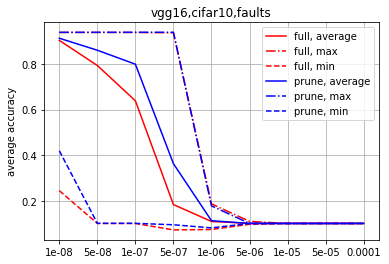

common_fault_rates 9 [1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001]
faults_results_list.shape: (2, 9, 20, 3)
full: [0.9388   0.938795 0.938795 0.93876  0.93863  0.938685 0.93856  0.937715
 0.935985]
prune: [0.9395   0.939505 0.93951  0.939535 0.939505 0.939455 0.93935  0.938605
 0.93831 ]


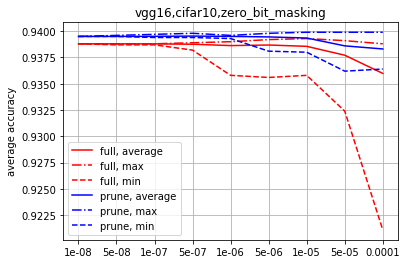

In [8]:
# compare full faults and prune faults results
for fault_type in fault_types:
    common_fault_rates = sorted(set(data['full'][fault_type].keys()).intersection(data['prune'][fault_type].keys()))
    print('common_fault_rates', len(common_fault_rates), common_fault_rates)

    # get the accuracy results
    faults_results_list = [] 
    for model_type in model_types:
        faults_results =  data[model_type][fault_type]
        faults_results_list.append([faults_results[fault_rate] for fault_rate in common_fault_rates])
    faults_results_list = np.asarray(faults_results_list)
    print('faults_results_list.shape:', faults_results_list.shape)


    averaged = np.average(faults_results_list, axis=2)
    mins = np.min(faults_results_list, axis=2)
    maxs = np.max(faults_results_list, axis=2)
    print('full:', averaged[0, :, 2])
    print('prune:', averaged[1, :, 2])

    x = range(len(common_fault_rates))
    plt.plot(x, averaged[0, :, 2], 'r-', label='full, average')
    plt.plot(x, maxs[0, :, 2], 'r-.', label='full, max')
    plt.plot(x, mins[0, :, 2], 'r--', label='full, min')

    plt.plot(x, averaged[1, :, 2], 'b-', label='prune, average')
    plt.plot(x, maxs[1, :, 2], 'b-.', label='prune, max')
    plt.plot(x, mins[1, :, 2], 'b--', label='prune, min')

    plt.legend()
    plt.xticks(x, map(str, common_fault_rates))
    plt.grid()
    plt.ylabel('average accuracy')
    plt.title(model_name+','+dataset_name+','+fault_type)
    plt.show()


common_fault_rates 9 [1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001]
faults_results_list.shape: (2, 9, 20, 3)
full: [5.050000e+00 2.400000e+01 4.770000e+01 2.421000e+02 4.772500e+02
 2.399550e+03 4.797050e+03 2.400820e+04 4.793795e+04]
prune: [1.800000e+00 8.450000e+00 1.690000e+01 8.795000e+01 1.732500e+02
 8.621000e+02 1.720300e+03 8.630550e+03 1.722525e+04]


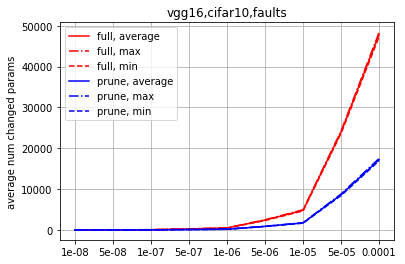

common_fault_rates 9 [1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001]
faults_results_list.shape: (2, 9, 20, 3)
full: [5.05000e+00 2.40000e+01 4.77000e+01 2.42100e+02 4.77250e+02 2.39945e+03
 4.79650e+03 2.39981e+04 4.79038e+04]
prune: [1.800000e+00 8.450000e+00 1.690000e+01 8.795000e+01 1.732500e+02
 8.620000e+02 1.720050e+03 8.626550e+03 1.721205e+04]


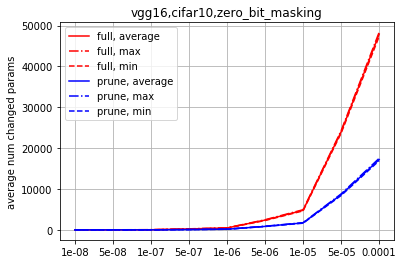

In [9]:
# compare full faults and prune faults results: #params changed 
for fault_type in fault_types:
    common_fault_rates = sorted(set(data['full'][fault_type].keys()).intersection(data['prune'][fault_type].keys()))
    print('common_fault_rates', len(common_fault_rates), common_fault_rates)

    # get the accuracy results
    faults_results_list = [] 
    for model_type in model_types:
        faults_results =  data[model_type][fault_type]
        faults_results_list.append([faults_results[fault_rate] for fault_rate in common_fault_rates])
    faults_results_list = np.asarray(faults_results_list)
    print('faults_results_list.shape:', faults_results_list.shape)


    averaged = np.average(faults_results_list, axis=2)
    mins = np.min(faults_results_list, axis=2)
    maxs = np.max(faults_results_list, axis=2)
    print('full:', averaged[0, :, 1])
    print('prune:', averaged[1, :, 1])

    x = range(len(common_fault_rates))
    plt.plot(x, averaged[0, :, 1], 'r-', label='full, average')
    plt.plot(x, maxs[0, :, 1], 'r-.', label='full, max')
    plt.plot(x, mins[0, :, 1], 'r--', label='full, min')

    plt.plot(x, averaged[1, :, 1], 'b-', label='prune, average')
    plt.plot(x, maxs[1, :, 1], 'b-.', label='prune, max')
    plt.plot(x, mins[1, :, 1], 'b--', label='prune, min')

    plt.legend()
    plt.xticks(x, map(str, common_fault_rates))
    plt.grid()
    plt.ylabel('average num changed params')
    plt.title(model_name+','+dataset_name+','+fault_type)
    plt.show()

faults_results_list.shape: (4, 20, 3)


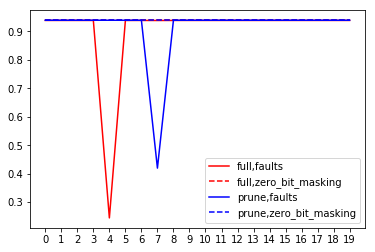

[(4, array([11.    , 11.    ,  0.2441])), (0, array([3.    , 3.    , 0.9388]))]
[(7, array([2.    , 2.    , 0.4193])), (0, array([1.    , 1.    , 0.9395]))]


In [28]:
# analyze bad model and good model using fault_rate=1e-08
fault_rate = 1e-08

# get the accuracy results
faults_results_list = []
legends = [] 
model_types = ['full', 'prune']
fault_types = ['faults', 'zero_bit_masking']
for model_type in model_types:
    for fault_type in fault_types:
        faults_results_list.append(data[model_type][fault_type][fault_rate])
        legends.append(model_type+','+fault_type)
        
faults_results_list = np.asarray(faults_results_list)
print('faults_results_list.shape:', faults_results_list.shape)
num_trials = faults_results_list.shape[1]

plt.plot(range(num_trials), faults_results_list[0, :, 2], 'r-')
plt.plot(range(num_trials), faults_results_list[1, :, 2], 'r--')
plt.plot(range(num_trials), faults_results_list[2, :, 2], 'b-')
plt.plot(range(num_trials), faults_results_list[3, :, 2], 'b--')
plt.legend(legends)
plt.xticks(range(num_trials), map(str, range(num_trials)))
plt.show()

# get the bad and good trial ids  
full_faults_trial_ids = [np.argmin(faults_results_list[0, :, 2]), np.argmax(faults_results_list[0, :, 2])]
prune_faults_trial_ids = [np.argmin(faults_results_list[2, :, 2]), np.argmax(faults_results_list[2, :, 2])]
print([(i, faults_results_list[0, i]) for i in full_faults_trial_id])
print([(i, faults_results_list[2, i]) for i in prune_faults_trial_id])

In [72]:
import pickle 
def load_pickle(load_path, load_name=None, verbose=False):
    if load_name:
        filepath =  os.path.join(load_path, load_name)
    else:
        filepath = load_path 
    if verbose:
        print('Load pickle file:', filepath)
    return pickle.load( open(filepath, "rb" ))

def parse_stats(stats):
    # input format:
    # stats = {param_name: {value: [(flipped bit position, bit value after flip, value after flip)]}}
    # output format: 
    # param_name: #values changed,  #0 -> 1 bit flips, # 1-> 0 bit flips 
    param_stats = {} # key=param_name, value =dictionary
    for param_name, param_dict in stats.items():

        param_stats[param_name] = {'changed_params':0, 
                                   'flip_to_one': np.zeros(32), 
                                   'flip_to_zero': np.zeros(32),
                                  'value_before_flip': [],
                                  'value_after_flip':[], 
                                  'flipped_positions': []}
            
        for param_value, flip_list in param_dict.items():
            param_stats[param_name]['changed_params'] += 1
            param_stats[param_name]['value_before_flip'].append(round(param_value, 6))
            param_stats[param_name]['value_after_flip'].append(round(flip_list[-1][-1], 6))
            param_stats[param_name]['flipped_positions'].append([x[0] for x in flip_list])
            
            for flip_pos, flip_bit, flip_value in flip_list:
                if flip_bit:
                    param_stats[param_name]['flip_to_one'][flip_pos] += 1
                else:
                    param_stats[param_name]['flip_to_zero'][flip_pos] += 1
    return param_stats 

def trial_id_to_stats_files(trial_id):
    return str(trial_id)+'.pkl' 

def load_and_average_stats(results_dir, fault_rate, trial_ids):
    folder = str(fault_rate)
    stat_dir = os.path.join(results_dir, folder, 'stats')
    stats_files = map(trial_id_to_stats_files, trial_ids)
    avg_param_stats = None 
    for f in stats_files:
        # each trial is saved as a pickle 
        stats = load_pickle(stat_dir, f)
#         print stats
#         return 
        param_stats = parse_stats(stats)
        if avg_param_stats:
            for param_name, param_dict in param_stats.items():
                if param_name not in avg_param_stats:
                    avg_param_stats[param_name] = param_dict 
                else:
                    for key, value in param_dict.items():
                        avg_param_stats[param_name][key] += value 
        else:
            avg_param_stats = param_stats
    return avg_param_stats
                    

Number of variables: 45
conv/FC-0: [(0, (64, 3, 3, 3)), (1, (64,)), (2, (64,))]
conv/FC-1: [(3, (64, 64, 3, 3)), (4, (64,)), (5, (64,))]
conv/FC-2: [(6, (128, 64, 3, 3)), (7, (128,)), (8, (128,))]
conv/FC-3: [(9, (128, 128, 3, 3)), (10, (128,)), (11, (128,))]
conv/FC-4: [(12, (256, 128, 3, 3)), (13, (256,)), (14, (256,))]
conv/FC-5: [(15, (256, 256, 3, 3)), (16, (256,)), (17, (256,))]
conv/FC-6: [(18, (256, 256, 3, 3)), (19, (256,)), (20, (256,))]
conv/FC-7: [(21, (512, 256, 3, 3)), (22, (512,)), (23, (512,))]
conv/FC-8: [(24, (512, 512, 3, 3)), (25, (512,)), (26, (512,))]
conv/FC-9: [(27, (512, 512, 3, 3)), (28, (512,)), (29, (512,))]
conv/FC-10: [(30, (512, 512, 3, 3)), (31, (512,)), (32, (512,))]
conv/FC-11: [(33, (512, 512, 3, 3)), (34, (512,)), (35, (512,))]
conv/FC-12: [(36, (512, 512, 3, 3)), (37, (512,)), (38, (512,))]
conv/FC-13: [(39, (512, 512)), (40, (512,)), (41, (512,))]
conv/FC-14: [(42, (512,)), (43, (10, 512)), (44, (10,))]


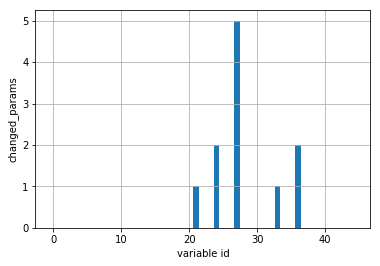

changed variables: [(21, (512, 256, 3, 3)), (24, (512, 512, 3, 3)), (27, (512, 512, 3, 3)), (33, (512, 512, 3, 3)), (36, (512, 512, 3, 3))]

fault_type:faults
(21, (512, 256, 3, 3)) [(-0.013208, -0.013208, [24])]
(24, (512, 512, 3, 3)) [(0.004948, 0.0, [4]), (-0.000806, -0.000806, [22])]
(27, (512, 512, 3, 3)) [(-0.006012, -0.006012, [27]), (-0.004594, -0.004594, [25]), (-0.0055, -0.00275, [8]), (0.00746, 0.00746, [27]), (0.003027, 1.030033694308061e+36, [1])]
(33, (512, 512, 3, 3)) [(-0.003395, 0.003395, [0])]
(36, (512, 512, 3, 3)) [(0.001102, 0.001591, [9]), (-9.2e-05, -9.2e-05, [15])]

fault_type:zero_bit_masking
(21, (512, 256, 3, 3)) [(-0.013208, -0.013208, [24])]
(24, (512, 512, 3, 3)) [(0.004948, 0.0, [4]), (-0.000806, -0.000806, [22])]
(27, (512, 512, 3, 3)) [(-0.006012, -0.006012, [27]), (-0.004594, -0.004594, [25]), (-0.0055, -0.00275, [8]), (0.00746, 0.00746, [27]), (0.003027, 0.003027, [1])]
(33, (512, 512, 3, 3)) [(-0.003395, 0.003395, [0])]
(36, (512, 512, 3, 3)) [(0.001

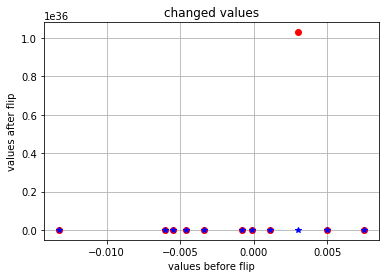

In [73]:
import functools 

model_type = 'full'
fault_type = 'faults'
results_dir = get_results_dir(model_name, dataset_name, model_type, fault_type)
avg_params_stats = load_and_average_stats(results_dir, fault_rate, [full_faults_trial_ids[0]]) # bad trials

# plot the number of changed params for each variable
variables = sorted(avg_params_stats.keys(), key=lambda x: x[0])
print('Number of variables:', len(variables))
for layer_id in range(15):
    print('conv/FC-%d: %s' %(layer_id, variables[layer_id*3:(layer_id+1)*3]))


plt.bar(range(len(variables)), [avg_params_stats[var]['changed_params'] for var in variables])
plt.xlabel('variable id')
plt.ylabel('changed_params')
plt.grid()
plt.show()

changed_vars = [var for var in variables if avg_params_stats[var]['changed_params']]
print('changed variables:', changed_vars)

# compare value before flip and value after flip 
colors = ['r', 'b']
markers = ['o', '*']
for i, fault_type in enumerate(fault_types):
    print('\nfault_type:%s' %(fault_type))
    results_dir = get_results_dir(model_name, dataset_name, model_type, fault_type)
    avg_params_stats = load_and_average_stats(results_dir, fault_rate, [full_faults_trial_ids[0]]) # bad trials

    for var in changed_vars:
        print(var, 
              list(zip(avg_params_stats[var]['value_before_flip'], 
               avg_params_stats[var]['value_after_flip'], 
               avg_params_stats[var]['flipped_positions'])))

    values_before = functools.reduce(lambda x, y: x+y, 
                                     [avg_params_stats[var]['value_before_flip'] for var in changed_vars])
    values_after = functools.reduce(lambda x, y: x+y, 
                                     [avg_params_stats[var]['value_after_flip'] for var in changed_vars])
    plt.plot(values_before, values_after, linestyle='', color=colors[i], marker=markers[i])
plt.xlabel('values before flip')
plt.ylabel('values after flip')
plt.title('changed values')
plt.grid()
plt.show()

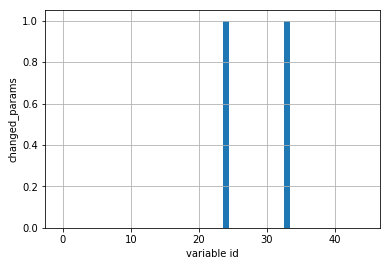

changed variables: [(24, (256, 256, 3, 3)), (33, (256, 256, 3, 3))]

fault_type:faults
(24, (256, 256, 3, 3)) [(-0.008036, -2.734455764917965e+36, [1])]
(33, (256, 256, 3, 3)) [(0.00188, 0.001879, [19])]

fault_type:zero_bit_masking
(24, (256, 256, 3, 3)) [(-0.008036, -0.008036, [1])]
(33, (256, 256, 3, 3)) [(0.00188, 0.001879, [19])]


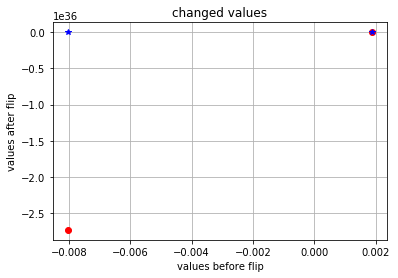

In [74]:
model_type = 'prune'
fault_type = 'faults'
results_dir = get_results_dir(model_name, dataset_name, model_type, fault_type)
avg_params_stats = load_and_average_stats(results_dir, fault_rate, [prune_faults_trial_ids[0]]) # bad trials

# plot the number of changed params for each variable
variables = sorted(avg_params_stats.keys(), key=lambda x: x[0])

plt.bar(range(len(variables)), [avg_params_stats[var]['changed_params'] for var in variables])
plt.xlabel('variable id')
plt.ylabel('changed_params')
plt.grid()
plt.show()


changed_vars = [var for var in variables if avg_params_stats[var]['changed_params']]
print('changed variables:', changed_vars)

# compare value before flip and value after flip 
colors = ['r', 'b']
markers = ['o', '*']
for i, fault_type in enumerate(fault_types):
    print('\nfault_type:%s' %(fault_type))
    results_dir = get_results_dir(model_name, dataset_name, model_type, fault_type)
    avg_params_stats = load_and_average_stats(results_dir, fault_rate, [prune_faults_trial_ids[0]]) # bad trials

    for var in changed_vars:
        print(var, 
              list(zip(avg_params_stats[var]['value_before_flip'], 
               avg_params_stats[var]['value_after_flip'], 
               avg_params_stats[var]['flipped_positions'])))

    values_before = functools.reduce(lambda x, y: x+y, 
                                     [avg_params_stats[var]['value_before_flip'] for var in changed_vars])
    values_after = functools.reduce(lambda x, y: x+y, 
                                     [avg_params_stats[var]['value_after_flip'] for var in changed_vars])
    plt.plot(values_before, values_after, linestyle='', color=colors[i], marker=markers[i])
plt.xlabel('values before flip')
plt.ylabel('values after flip')
plt.title('changed values')
plt.grid()
plt.show()